In [ ]:
#libraries
import nltk
import pandas as pd
from matplotlib import pyplot as plt
from nltk.tokenize.toktok import ToktokTokenizer
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import precision_recall_curve

In [ ]:
#read csv files
train_data = pd.read_csv('train.csv',encoding='latin-1')
test_data = pd.read_csv('test.csv',encoding='latin-1')

In [ ]:
train_data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
#total no of rows and columns in dataset
train_data.shape

(27481, 10)

In [ ]:
train_data['text'].describe()

count                                    27480
unique                                   27480
top        I`d have responded, if I were going
freq                                         1
Name: text, dtype: object

In [ ]:
test_data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (KmÂ²),Density (P/KmÂ²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely --...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
test_data.shape

(3534, 9)

In [ ]:
test_data['text'].describe()

count           3534
unique          3533
top       that sucks
freq               2
Name: text, dtype: object

In [ ]:
train_data['sentiment'].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [ ]:
test_data['sentiment'].value_counts()

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

In [ ]:
#checking for missing values in the dataset
train_data.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [ ]:
train_data.dropna(subset=['text', 'selected_text'], inplace=True)
train_data.isnull().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [ ]:
test_data.isnull().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (KmÂ²)    0
Density (P/KmÂ²)    0
dtype: int64

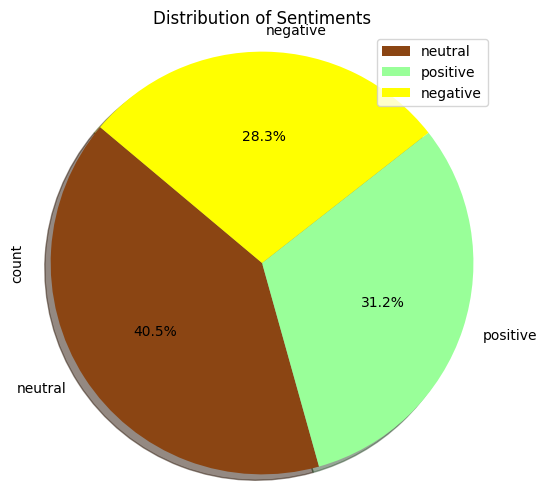

In [ ]:
sentiment_count = train_data['sentiment'].value_counts()
colors = ['#8B4513', '#99FF99', '#FFFF00']
# Plot
plt.figure(figsize=(6, 6))
sentiment_count.plot(kind='pie', autopct='%1.1f%%', labels=sentiment_count.index, colors=colors, startangle=140, shadow=True)
plt.title('Distribution of Sentiments')
plt.legend(loc="upper right")
plt.axis('equal')
plt.show()

In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27480 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27480 non-null  object 
 4   Time of Tweet     27480 non-null  object 
 5   Age of User       27480 non-null  object 
 6   Country           27480 non-null  object 
 7   Population -2020  27480 non-null  int64  
 8   Land Area (Km²)   27480 non-null  float64
 9   Density (P/Km²)   27480 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.3+ MB
None


In [ ]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   int64  
 7   Land Area (KmÂ²)  3534 non-null   float64
 8   Density (P/KmÂ²)  3534 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 248.6+ KB
None


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
def processed_text(text):
  text = re.sub(r'\_\w*', '', text) #removing words that starts with _
  text = re.sub(r'\$\w*', '', text) #removing words that starts with $
  text = re.sub(r'\@\w*', '', text) #removing words that starts with @
  text = re.sub(r'https?://[^\s\n\r]+', '', text) #removing URLS starting with 'http://' or 'https://'
  text = re.sub(r'#', '', text) #Removing the '#' symbol (used for hashtags).
  text = re.sub(r'http\S+', '', text)  # removing the  remaining URLs.
  text = re.sub(r'[^a-zA-Z\s]', '', text) # removing characters that are neither alphabets nor spaces
  text = re.sub(r'\s+', ' ', text) #removing extra sapaces
  return text

train_data['text']=train_data['text'].apply(processed_text)
train_data['selected_text']=train_data['selected_text'].apply(processed_text)
test_data['text']=test_data['text'].apply(processed_text)

In [ ]:
train_data['text'][27160]

' me too I dont want to ooze while speaking either why do I have lame jokes about wiping social media off my shoe lol'

In [ ]:
#stemming the text
def stemming(text):
  temp= nltk.porter.PorterStemmer()
  text = ' '.join([temp.stem(word) for word in text.split()])
  return text

train_data['text']=train_data['text'].apply(stemming)
train_data['selected_text']=train_data['selected_text'].apply(stemming)
test_data['text']=test_data['text'].apply(stemming)

In [ ]:
stop=set(stopwords.words('english'))
print(stop)

{'between', 'some', 's', 'theirs', 'been', "doesn't", 'before', 'there', 'o', 'under', "you've", 'which', 'weren', 'and', "you'll", 'by', "didn't", 'should', 'not', 'haven', 'ours', 'more', 'those', 'hasn', "that'll", 'y', 'very', 'while', 'a', 'will', 'does', 'd', 'the', 'is', 'into', 'now', 'hadn', 'at', "isn't", 'too', 'll', 'that', 'or', 'during', 'most', 'didn', 'because', 'are', "don't", 'doesn', 'again', 'here', 'hers', 'just', 'needn', 'few', 'had', 'them', 'further', 'she', 'out', 'all', 'down', 'am', 'itself', 'when', 'yourself', 'couldn', 'these', 'about', "mustn't", 've', 'yourselves', 'on', 'can', 'yours', 'it', 'until', 'up', 'such', 'ourselves', 'same', 'your', 'aren', 'him', 'whom', "it's", 'own', 'with', 'were', 'in', 'me', "couldn't", "won't", "weren't", 'who', 'has', 'if', 'how', 'we', 'he', 'doing', 'you', 'herself', "hadn't", 'his', "aren't", 'shouldn', 'above', 'be', 'isn', "wouldn't", 'an', 'other', 'both', 'themselves', 'being', 'her', 'mightn', 'off', 'have', '

In [ ]:
def removing_stopwords(text):
  tokens = tokenizer.tokenize(text)
  filtered_word = [word for word in tokens if word.lower() not in stopword_list]
  filtered_text = ' '.join(filtered_word)
  return filtered_text

train_data['Preprocessed_Text']=train_data['text'].apply(removing_stopwords)
test_data['preprocessed_Text']= test_data['text'].apply(removing_stopwords)

In [ ]:
train_data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Preprocessed_Text
0,cb774db0d1,id have respond if i were go,id have respond if i were go,neutral,morning,0-20,Afghanistan,38928346,652860.0,60,id respond go
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,noon,21-30,Albania,2877797,27400.0,105,sooo sad miss san diego
2,088c60f138,my boss is bulli me,bulli me,negative,night,31-45,Algeria,43851044,2381740.0,18,boss bulli
3,9642c003ef,what interview leav me alon,leav me alon,negative,morning,46-60,Andorra,77265,470.0,164,interview leav alon
4,358bd9e861,son of whi couldnt they put them on the releas...,son of,negative,noon,60-70,Angola,32866272,1246700.0,26,son whi couldnt put releas alreadi bought


In [ ]:
test_data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (KmÂ²),Density (P/KmÂ²),preprocessed_Text
0,f87dea47db,last session of the day,neutral,morning,0-20,Afghanistan,38928346,652860.0,60,last session day
1,96d74cb729,shanghai is also realli excit precis skyscrap ...,positive,noon,21-30,Albania,2877797,27400.0,105,shanghai also realli excit precis skyscrap gal...
2,eee518ae67,recess hit veroniqu branquinho she ha to quit ...,negative,night,31-45,Algeria,43851044,2381740.0,18,recess hit veroniqu branquinho ha quit compani...
3,01082688c6,happi bday,positive,morning,46-60,Andorra,77265,470.0,164,happi bday
4,33987a8ee5,i like it,positive,noon,60-70,Angola,32866272,1246700.0,26,like


In [ ]:
tfidf_vector = TfidfVectorizer(max_features = 100000)
tfidf_train_features = tfidf_vector.fit_transform(train_data['Preprocessed_Text'])
print(f"TF-IDF training features shape: {tfidf_train_features.shape}")
tfidf_test_features = tfidf_vector.transform(test_data['preprocessed_Text'])
print(f'TF-IDF test data features shape: {tfidf_test_features.shape}')

TF-IDF training features shape: (27480, 21084)
TF-IDF test data features shape: (3534, 21084)


In [ ]:
labelencoder = LabelEncoder()
train_label_encoder = labelencoder.fit_transform(train_data['sentiment'])
print(train_label_encoder.shape)
test_label_encoder = labelencoder.fit_transform(test_data['sentiment'])
print (test_label_encoder.shape)

(27480,)
(3534,)


In [ ]:
print (f'unique values for train data set : {np.unique(train_label_encoder)}')
print(labelencoder.inverse_transform(np.unique(train_label_encoder)))
print(f'unique values for test data set: {np.unique(test_label_encoder)}')
print(labelencoder.inverse_transform(np.unique(test_label_encoder)))

unique values for train data set : [0 1 2]
['negative' 'neutral' 'positive']
unique values for test data set: [0 1 2]
['negative' 'neutral' 'positive']


**implementation of Machine learning algorithms**

**1) Logistic Regression**

In [ ]:
lr = LogisticRegression(penalty = 'l2',max_iter=500,C=1,random_state = 42)
#Fitting the model for Bag of words
lr.fit(tfidf_train_features, train_label_encoder)
#Fitting the model for tfidf features
test_predictions_lr_encoded=lr.predict(tfidf_test_features)
test_predictions_lr = labelencoder.inverse_transform(test_predictions_lr_encoded)

In [ ]:
accuracy_lr = accuracy_score(test_data['sentiment'], test_predictions_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

Logistic Regression Accuracy: 0.71


In [ ]:
print("Logistic Regression Confusion Matrix:")
confuion_matrix_for_lr = confusion_matrix(test_data['sentiment'], test_predictions_lr)
print(confuion_matrix_for_lr)

Logistic Regression Confusion Matrix:
[[ 648  316   37]
 [ 213 1068  149]
 [  46  267  790]]


In [ ]:
print("Logistic Regression Classification Report:")
print( classification_report(test_data['sentiment'], test_predictions_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.65      0.68      1001
     neutral       0.65      0.75      0.69      1430
    positive       0.81      0.72      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.70      0.71      3534
weighted avg       0.72      0.71      0.71      3534



**2) multinomial-naive bayes**

In [ ]:
mnb=MultinomialNB()
#fitting the mnb for bag of words
mnb.fit(tfidf_train_features, train_label_encoder)
#Fitting the model for tfidf features
test_predictions_mnb_encoded=mnb.predict(tfidf_test_features)
test_predictions_mnb = labelencoder.inverse_transform(test_predictions_mnb_encoded)

In [ ]:
accuracy_mnb= accuracy_score(test_data['sentiment'], test_predictions_mnb)
print(f"Multinomial NB Accuracy: {accuracy_mnb:.2f}")

Multinomial NB Accuracy: 0.63


In [ ]:
print("Multinomial NB Confusion Matrix:")
confusion_matrix_for_mnb=confusion_matrix(test_data['sentiment'], test_predictions_mnb)
print(confusion_matrix_for_mnb)

Multinomial NB Confusion Matrix:
[[ 418  548   35]
 [ 104 1179  147]
 [  31  443  629]]


In [ ]:
print("Multinomial NB Classification Report:")
print( classification_report(test_data['sentiment'], test_predictions_mnb))

Multinomial NB Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.42      0.54      1001
     neutral       0.54      0.82      0.65      1430
    positive       0.78      0.57      0.66      1103

    accuracy                           0.63      3534
   macro avg       0.69      0.60      0.62      3534
weighted avg       0.68      0.63      0.62      3534



**Visualization**

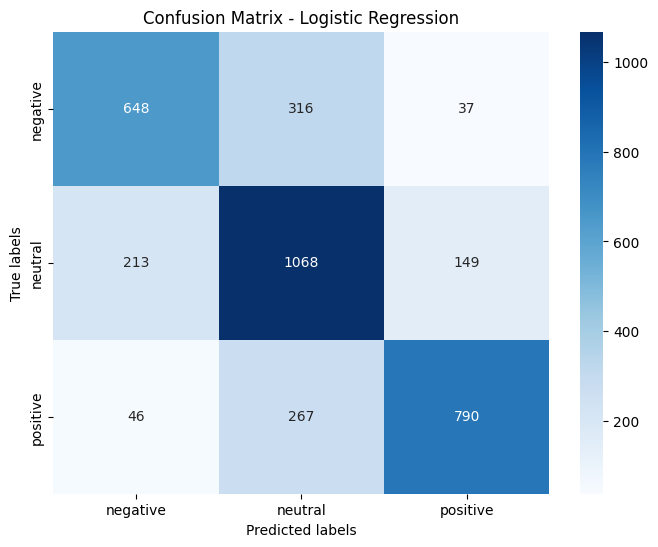

In [ ]:
# Plot confusion matrix for logistic regression
plt.figure(figsize=(8, 6))
sns.heatmap(confuion_matrix_for_lr, annot=True, fmt="d", cmap="Blues", xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

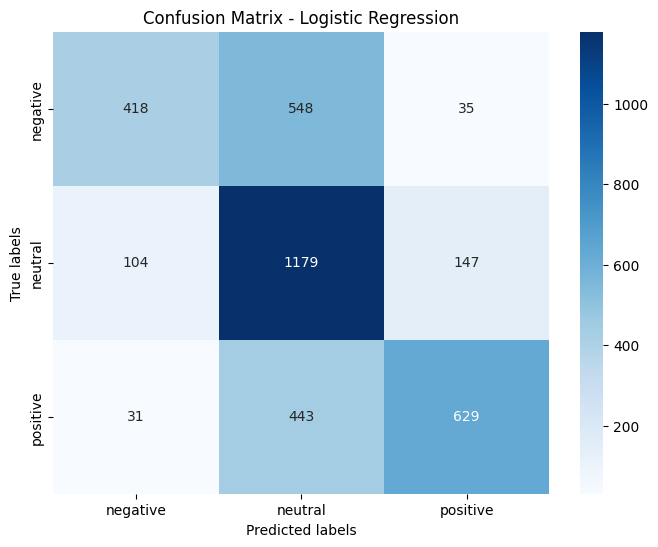

In [ ]:
# confusion matrix for multinomial naive bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_for_mnb, annot=True, fmt="d", cmap="Blues", xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

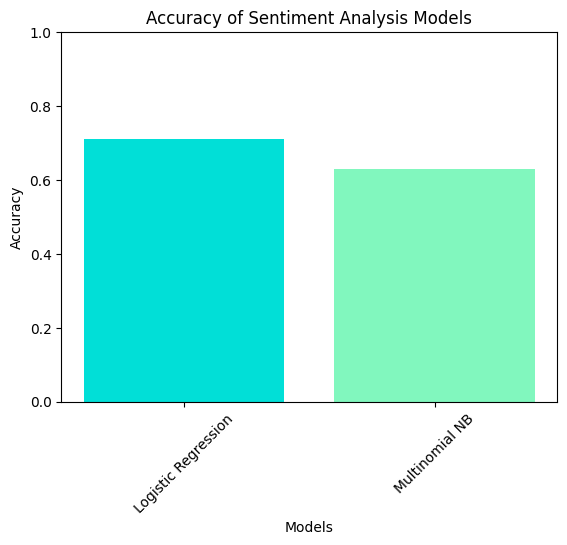

In [ ]:
#comparision between LR and MNB
models = ['Logistic Regression','Multinomial NB']
accuracies = [0.71,0.63] # Replace with the actual accuracy values for each model
colors=['#01DFD7', '#81F7BE'] # Specify a color for each bar
plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Sentiment Analysis Models')
plt.ylim(0, 1) # Set the y-axis limits to 0 and 1 for accuracy percentage
plt.xticks(rotation=45) # Rotate x-axis labels if needed
plt.show()